 #                                         KIVA ANALYSIS

This analysis is to study the kind of borrowers that Kiva.org has.Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower. 

At the end of the analysis we hope to have a detailed understanding of the organization's lending patterns. 

# Table of Contents

* [Import the data](#1)
* [Load the datasets](#2)
* [Summary display of each dataframe](#3)
* [Concise Summary of each dataset](#4)
* [Numerical Summary](#5)
* [Data Cleaning and Preparation](#6)
* [Exploratory Data Analysis](#7)


# 1. Import the data

Import the necessary python libraries. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 2.Load the datasets

The .csv files the information of the lenders in terms of gender, region, loan amount, repayment time etc. 

In [2]:
#The loan information 
loan_data = pd.read_csv('kiva_loans.csv')

#The region locations
region_data = pd.read_csv('datasets_12414_19728_kiva_mpi_region_locations.csv')

#The loan theme 
loan_theme = pd.read_csv('loan_theme_ids.csv')

#Loan theme by region
loan_theme_region = pd.read_csv('loan_themes_by_region.csv')


# 3.Summary display


In [3]:
loan_data.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
region_data.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
loan_theme.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [6]:
loan_theme_region.head()

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


# 4.Concise summary

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [8]:
region_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


# 5.Numerical Summary

In [9]:
loan_data.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [10]:
region_data.describe()

,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


# 6.Data Cleaning and Preparation

The interntion is to check for missing data and how to best handle it. 

## 6.1 Kiva Loan Data 

In [11]:
#Find the missing values then sort
null_values = loan_data.isnull().sum()

#Sort the missing values 
sorted_values = null_values.sort_values(ascending=False)

#Percentage of missing values 
percentage_null_values = (null_values/(loan_data.isnull().count().sort_values(ascending=False)))*100

#Display the table of missing values and their percentages 
missing_values = pd.concat([null_values, percentage_null_values], axis=1, keys=['Total Null Values', 'Percentage(%)'])

display(missing_values.sort_values(by=['Total Null Values', 'Percentage(%)'],ascending=False))

,Total Null Values,Percentage(%)
tags,171416,25.538546
region,56800,8.462392
funded_time,48331,7.200632
partner_id,13507,2.012351
use,4232,0.630508
borrower_genders,4221,0.628869
disbursed_time,2396,0.356970
country_code,8,0.001192
id,0,0.000000
funded_amount,0,0.000000


## 6.2 Kiva Region Data 

In [12]:
#Find the missing values then sort
null_values = region_data.isnull().sum()

#Sort the missing values 
sorted_values = null_values.sort_values(ascending=False)

#Percentage of missing values 
percentage_null_values = (null_values/(region_data.isnull().count().sort_values(ascending=False)))*100

#Display the table of missing values and their percentages 
missing_values = pd.concat([null_values, percentage_null_values], axis=1, keys=['Total Null Values', 'Percentage(%)'])

display(missing_values.sort_values(by=['Total Null Values', 'Percentage(%)'],ascending=False))

,Total Null Values,Percentage(%)
lat,1880,67.821068
lon,1880,67.821068
LocationName,1788,64.502165
region,1788,64.502165
MPI,1788,64.502165
ISO,1764,63.636364
country,1764,63.636364
world_region,1764,63.636364
geo,0,0.000000


#### From the above tables, it can be noted that the missing values are large in number therefore filling these values would lead to an inaccurate analysis. This analysis will be based off available data. 


# 7. Exploratory data analysis 

## 7.1 Loans distributed per sector 

A breakdown of the number of loans given in each represented sector from the highest to the lowest.

In [13]:
loan_per_sector = loan_data['sector'].value_counts()
display(pd.DataFrame({'Loan Count':loan_per_sector}))

,Loan Count
Agriculture,180302
Food,136657
Retail,124494
Services,45140
Personal Use,36385
Housing,33731
Clothing,32742
Education,31013
Transportation,15518
Arts,12060


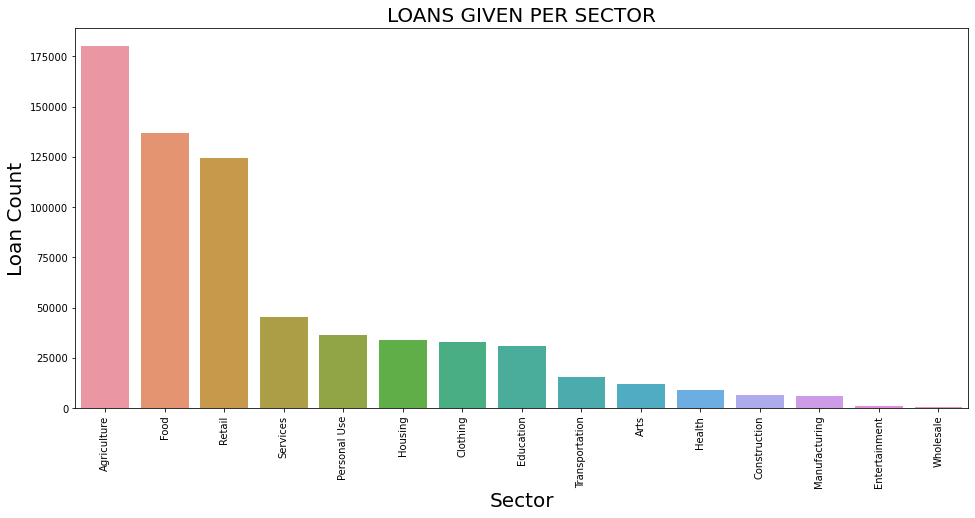

In [14]:
#Create a bar graph showing the different sectors.
plt.figure(figsize=(16,7))

sns.barplot(y=loan_per_sector.values,x=loan_per_sector.index)

plt.ylabel('Loan Count',fontsize=20)
plt.xlabel('Sector',fontsize=20)
plt.title('LOANS GIVEN PER SECTOR',fontsize=20)
plt.xticks(rotation=90)

plt.show()

### Observation: 
 - The Agriculture sector received the highest number of loans at 180,302 while the Wholesale sector received the lowest number of loans at 632. 

## 7.2 Loans distributed according to world region. 

A breakdown of how the loans were distributed globally in reference to the six world regions.

In [15]:
loan_per_world_region = region_data['world_region'].value_counts()
display(pd.DataFrame({'Loan Count':loan_per_world_region}))

,Loan Count
Sub-Saharan Africa,432
Latin America and Caribbean,221
East Asia and the Pacific,130
Arab States,119
South Asia,83
Europe and Central Asia,23


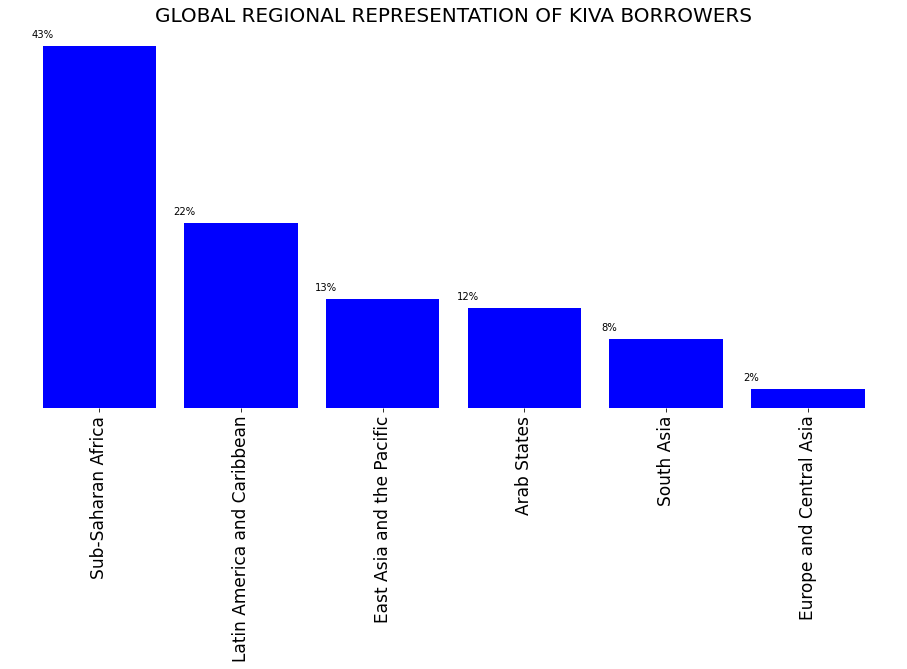

In [16]:
ax = (loan_per_world_region.div(loan_per_world_region.sum(), axis=0)).plot(kind='bar',figsize=(16,7), color = 'b',width = 0.8,
                                                         edgecolor=None)

plt.title('GLOBAL REGIONAL REPRESENTATION OF KIVA BORROWERS',fontsize=20)

plt.xticks(fontsize=17)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#Adding the annotations.
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01),ha='center')
    
plt.show()


### Observation: 
 - Sub-Saharan Africa contributed to 43% of the loan amounts awarded by Kiva which is highest globally followed by Latin America and Caribbean (22%) while Europe and Central Asia contributed to 2% of the awarded loans. 

## 7.2.1 World Region Multidimensional Poverty Index (MPI)  


MPI identifies multiple deprivations at the household and individual level in health, education and standard of living. To account for this, we look at the world region MPI. 


In [17]:
world_region_MPI = pd.pivot_table(region_data,index =['world_region'],values=['MPI' ],
                                   aggfunc='mean').sort_values(by=['MPI'],ascending=False)

world_region_MPI

,MPI
world_region,
Sub-Saharan Africa,0.337128
South Asia,0.219630
East Asia and the Pacific,0.136266
Arab States,0.115287
Latin America and Caribbean,0.063665
Europe and Central Asia,0.025273


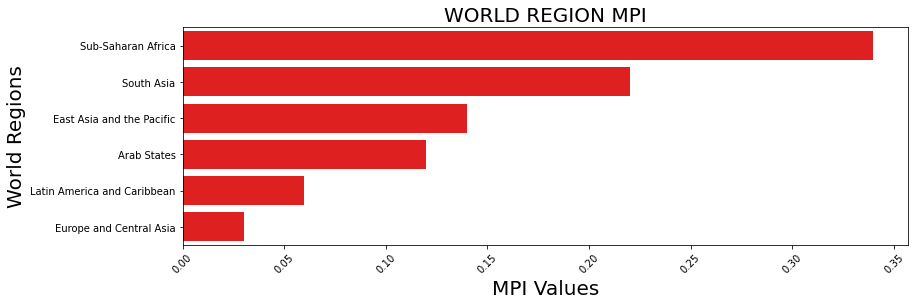

In [18]:
mpi_values = world_region_MPI['MPI'].round(2)

plt.figure(figsize=(13,4))

sns.barplot(y=mpi_values.index,x=mpi_values.values,orient='h',color='r')

plt.ylabel('World Regions',fontsize=20)
plt.xlabel('MPI Values',fontsize=20)
plt.title('WORLD REGION MPI',fontsize=20)
plt.xticks(rotation=45)

plt.show()

### Observation: 


 - From this [report](https://blogs.worldbank.org/opendata/number-extremely-poor-people-continues-rise-sub-saharan-africa), it shows that the number of extremely poor people continues to rise in Sub-Saharan Africa, while falling rapidly in all other regions. Therefore the MPI will always be high in Sub-Saharan Africa consequently having a high number of loans awarded in that region. 
 - Europe and Central Asia with the lowest MPI have a less affinity to borrowing loans compared to the other regions. 

## 7.3 Loans Given Per Country 

Merge the two dataframes 


In [19]:
kiva_data = pd.merge(loan_data,region_data).dropna()
display(kiva_data.head())

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,borrower_genders,repayment_interval,date,LocationName,ISO,world_region,MPI,geo,lat,lon
0,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
1,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,male,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
2,653364,250.0,250.0,Fuel/Firewood,Retail,to buy firewood to offer to her customers,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
4,653396,800.0,800.0,Clothing Sales,Clothing,to invest in working capital to stock their bu...,NI,Nicaragua,Leon,NIO,...,"female, female, female",monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
5,653402,800.0,800.0,Grocery Store,Food,to invest in working capital and to supply her...,NI,Nicaragua,Leon,NIO,...,female,monthly,2014-01-02,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569


In [20]:
kiva_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 52196
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  34856 non-null  int64  
 1   funded_amount       34856 non-null  float64
 2   loan_amount         34856 non-null  float64
 3   activity            34856 non-null  object 
 4   sector              34856 non-null  object 
 5   use                 34856 non-null  object 
 6   country_code        34856 non-null  object 
 7   country             34856 non-null  object 
 8   region              34856 non-null  object 
 9   currency            34856 non-null  object 
 10  partner_id          34856 non-null  float64
 11  posted_time         34856 non-null  object 
 12  disbursed_time      34856 non-null  object 
 13  funded_time         34856 non-null  object 
 14  term_in_months      34856 non-null  float64
 15  lender_count        34856 non-null  int64  
 16  tags

In [21]:
kiva_data[['funded_amount','loan_amount','country','world_region','MPI']].head(5)

,funded_amount,loan_amount,country,world_region,MPI
0,600.0,600.0,Nicaragua,Latin America and Caribbean,0.031
1,1000.0,1000.0,Nicaragua,Latin America and Caribbean,0.031
2,250.0,250.0,Nicaragua,Latin America and Caribbean,0.031
4,800.0,800.0,Nicaragua,Latin America and Caribbean,0.031
5,800.0,800.0,Nicaragua,Latin America and Caribbean,0.031


In [22]:
loan_per_country = pd.pivot_table(kiva_data,index =['country'],values=['funded_amount' ],
                                   aggfunc=sum).sort_values(by=['funded_amount'],ascending=False)
loan_per_country.head(10)


,funded_amount
country,
Nicaragua,6275425.0
Peru,4648725.0
Guatemala,3373150.0
Cambodia,2633600.0
El Salvador,1634725.0
Nigeria,1267000.0
Kenya,1131000.0
Zimbabwe,1064225.0
Tajikistan,988425.0


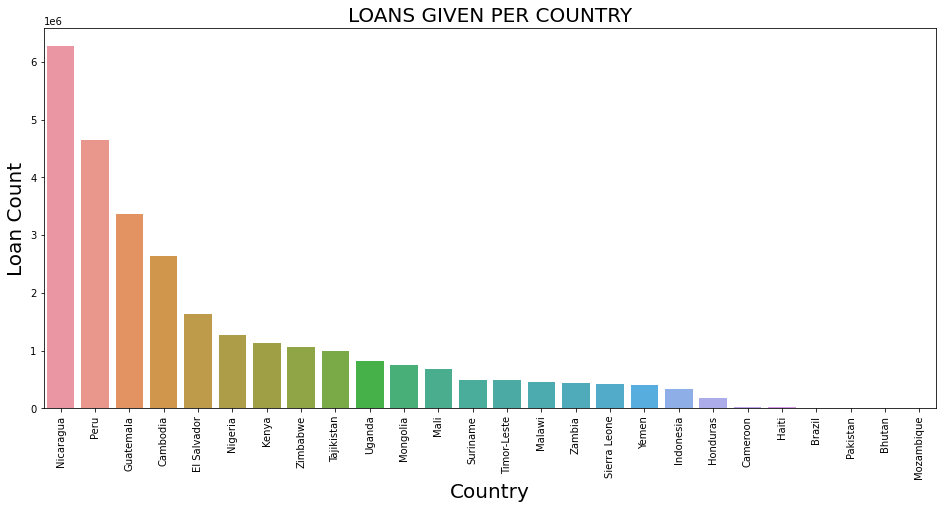

In [23]:
loan_count_per_country = loan_per_country['funded_amount'].round(1)

plt.figure(figsize=(16,7))

sns.barplot(y=loan_count_per_country.values,x=loan_count_per_country.index)

plt.ylabel('Loan Count',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.title('LOANS GIVEN PER COUNTRY',fontsize=20)
plt.xticks(rotation=90)

plt.show()

### Observation: 

 - Nicaragua received the highest amount of loans while Kenya and Uganda were the 7th and 10th highest borrowers respectively. 